In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 

In [2]:
df=pd.read_csv('datos/coches_normalizacion.csv', index_col=0)

In [3]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,wheel-base,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_BOX
0,88.6,168.8,64.1,48.8,2548,111.0,5000.0,21,27,13495,1.611061
1,88.6,168.8,64.1,48.8,2548,111.0,5000.0,21,27,16500,1.611586
2,94.5,171.2,65.5,52.4,2823,154.0,5000.0,19,26,16500,1.611586
3,99.8,176.6,66.2,54.3,2337,102.0,5500.0,24,30,13950,1.611153
4,99.4,176.6,66.4,54.3,2824,115.0,5500.0,18,22,17450,1.611721


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:



>Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.


>## Manualmente

- Para la columna 'wheel-base'

In [4]:

media = numericas["wheel-base"].mean()
desviacion = numericas["wheel-base"].std() 

In [5]:
numericas["wheel-base_ESTA"] = (numericas["wheel-base"] - media) / desviacion

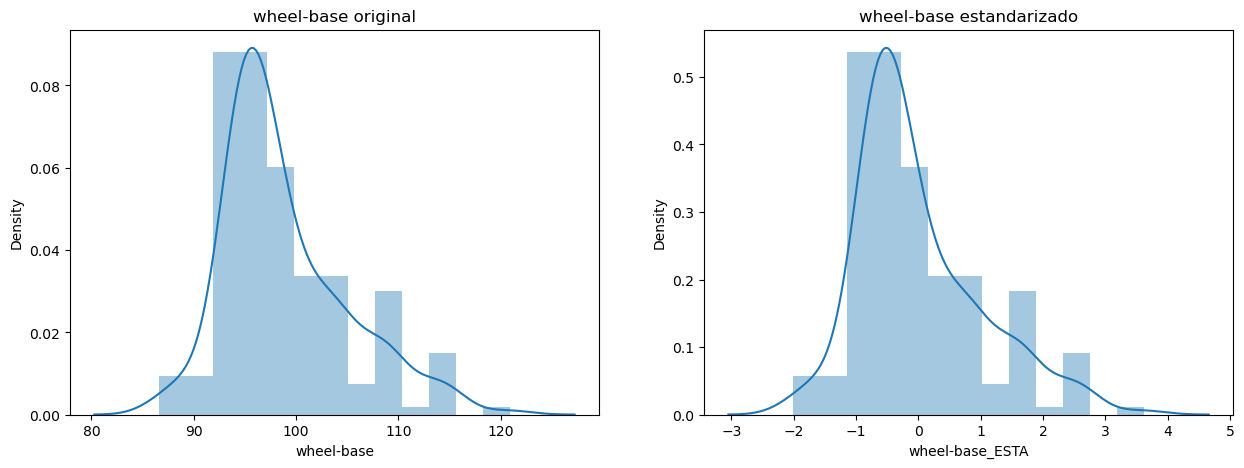

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('wheel-base original')
axes[1].set_title('wheel-base estandarizado')

sns.distplot(numericas['wheel-base'] ,ax = axes[0])
sns.distplot(numericas['wheel-base_ESTA'], ax = axes[1]);

- Para la columna 'horsepower'

In [7]:
media = numericas["horsepower"].mean()
desviacion = numericas["horsepower"].std() 

In [8]:
numericas["horsepower_ESTA"] = (numericas["horsepower"] - media) / desviacion

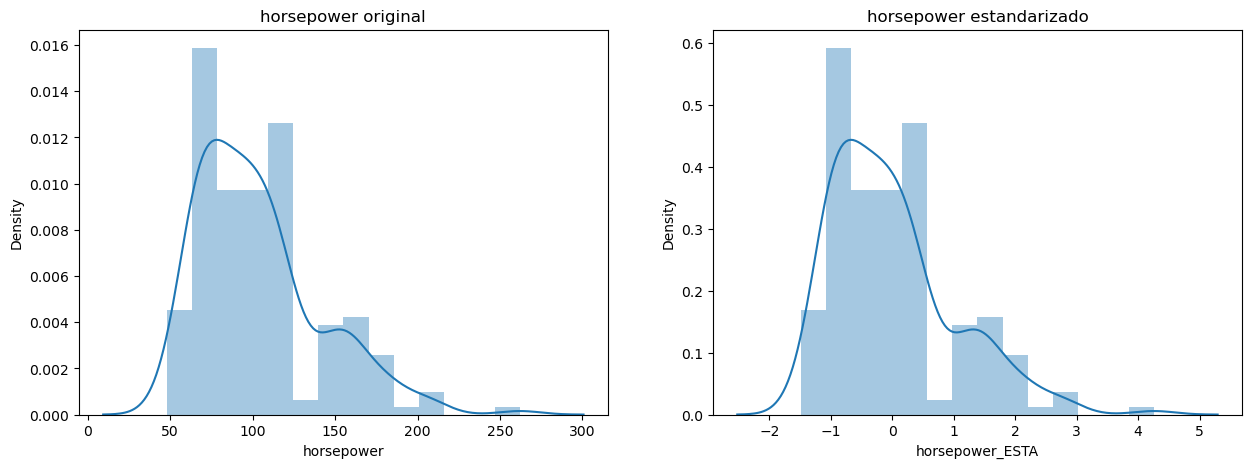

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('horsepower original')
axes[1].set_title('horsepower estandarizado')

sns.distplot(numericas['horsepower'] ,ax = axes[0])
sns.distplot(numericas['horsepower_ESTA'], ax = axes[1]);

>## Sklearn StandardScaler

In [10]:
df=pd.read_csv('datos/coches_EDA.csv', index_col=0)
numericas = df.select_dtypes(include = np.number)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
#Eliminamos la variable respuesta, porque queremos estandarizar las variables predictoras.
numericas.drop(['price'],axis=1,inplace=True)

In [14]:
scaler.fit(numericas)

StandardScaler()

In [15]:
X_escaladas=scaler.transform(numericas)

In [16]:
numericas_estand=pd.DataFrame(X_escaladas, columns=numericas.columns)

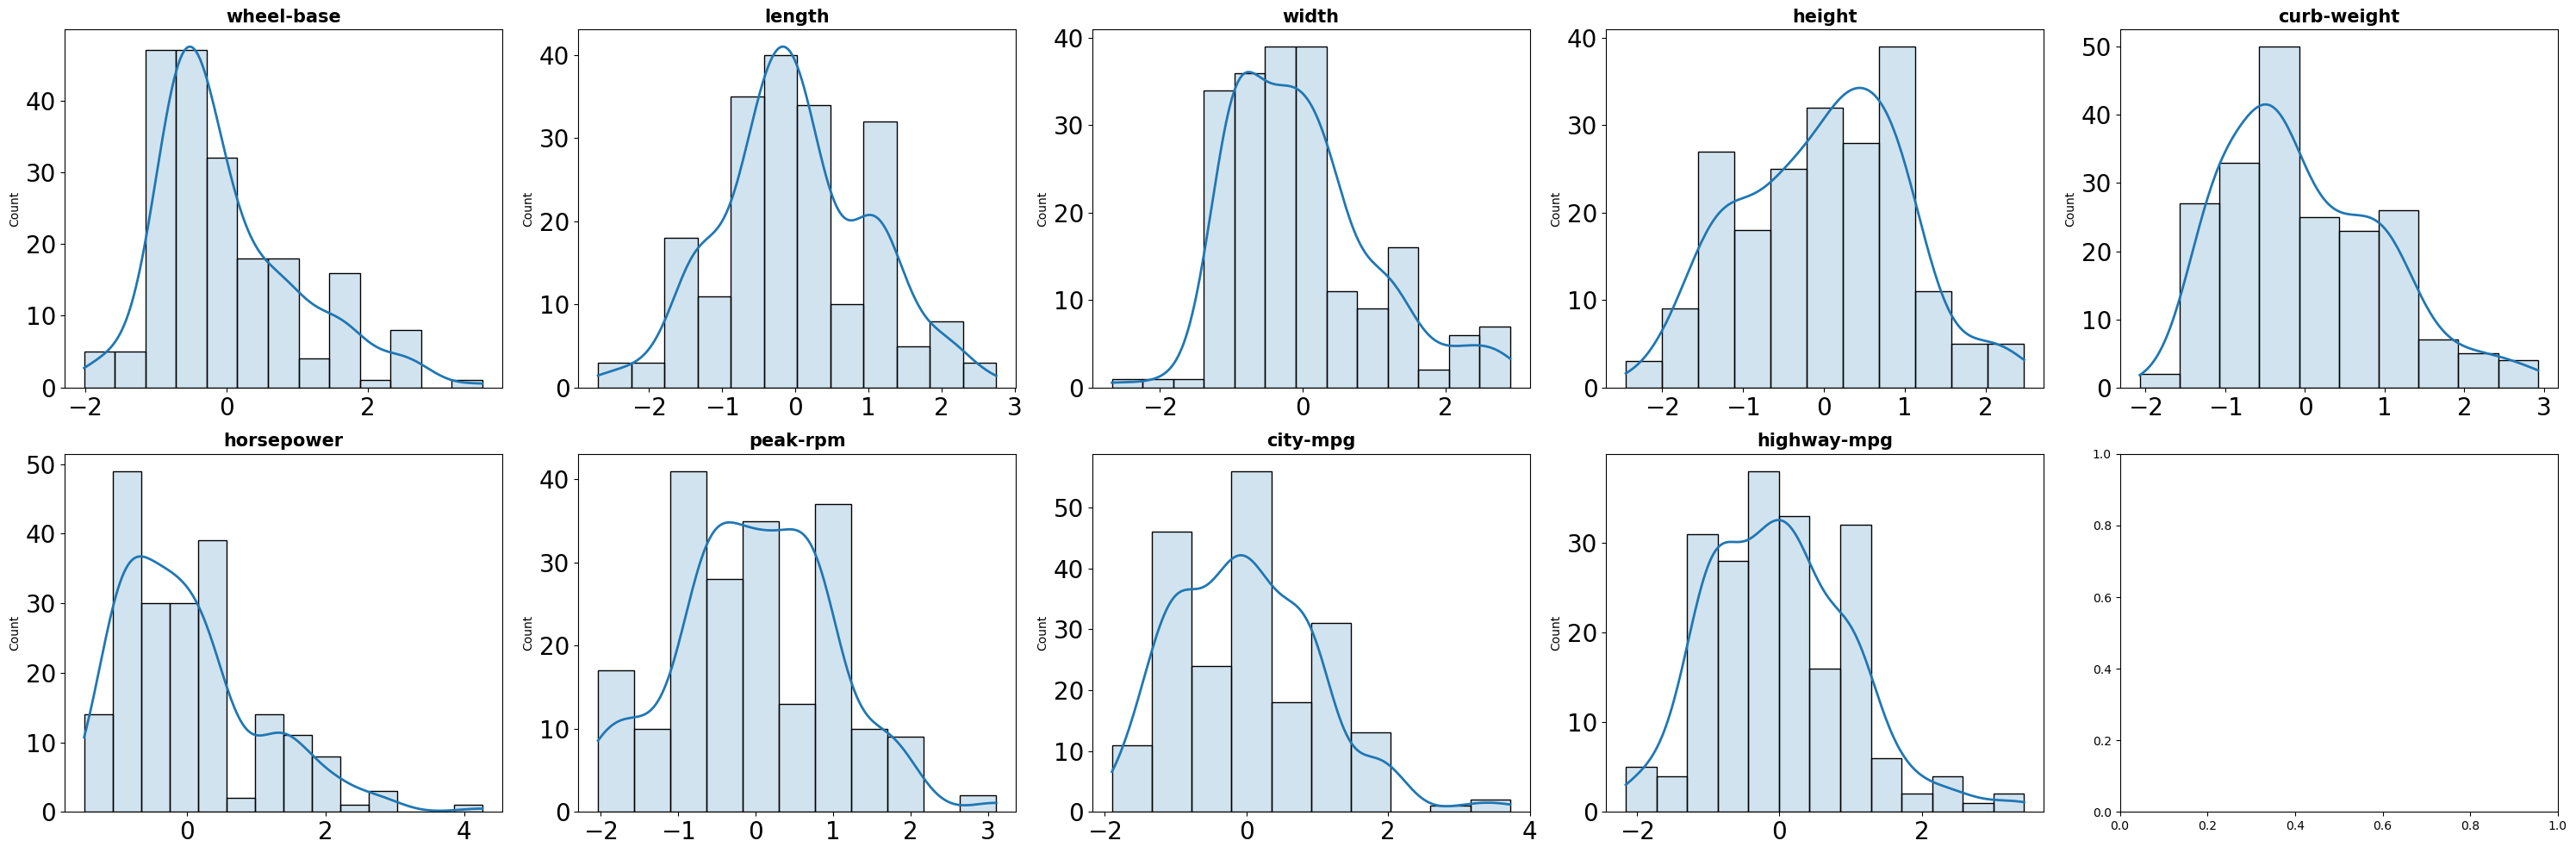

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 10))

columnas_estandar = numericas_estand.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estand,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
plt.tight_layout()

>## Sklearn RobustScaler: Utilizando los rangos intercuartílicos

In [18]:
df=pd.read_csv('datos/coches_EDA.csv', index_col=0)
numericas = df.select_dtypes(include = np.number)

In [19]:
#Eliminamos la variable respuesta, porque queremos estandarizar las variables predictoras.
numericas.drop(['price'],axis=1,inplace=True)

In [20]:
from sklearn.preprocessing import RobustScaler

In [21]:
robust=RobustScaler()

In [22]:
robust.fit(numericas)

RobustScaler()

In [23]:
X_robust=robust.transform(numericas)

In [24]:
numericas_robust=pd.DataFrame(X_robust, columns=numericas.columns)

In [25]:
df[numericas_robust.columns]=numericas_robust

In [26]:
df.head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,-1.063291,-0.263473,-0.518519,-1.514286,0.172709,four,0.347826,-0.285714,-0.272727,-0.333333,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,-1.063291,-0.263473,-0.518519,-1.514286,0.172709,four,0.347826,-0.285714,-0.272727,-0.333333,16500


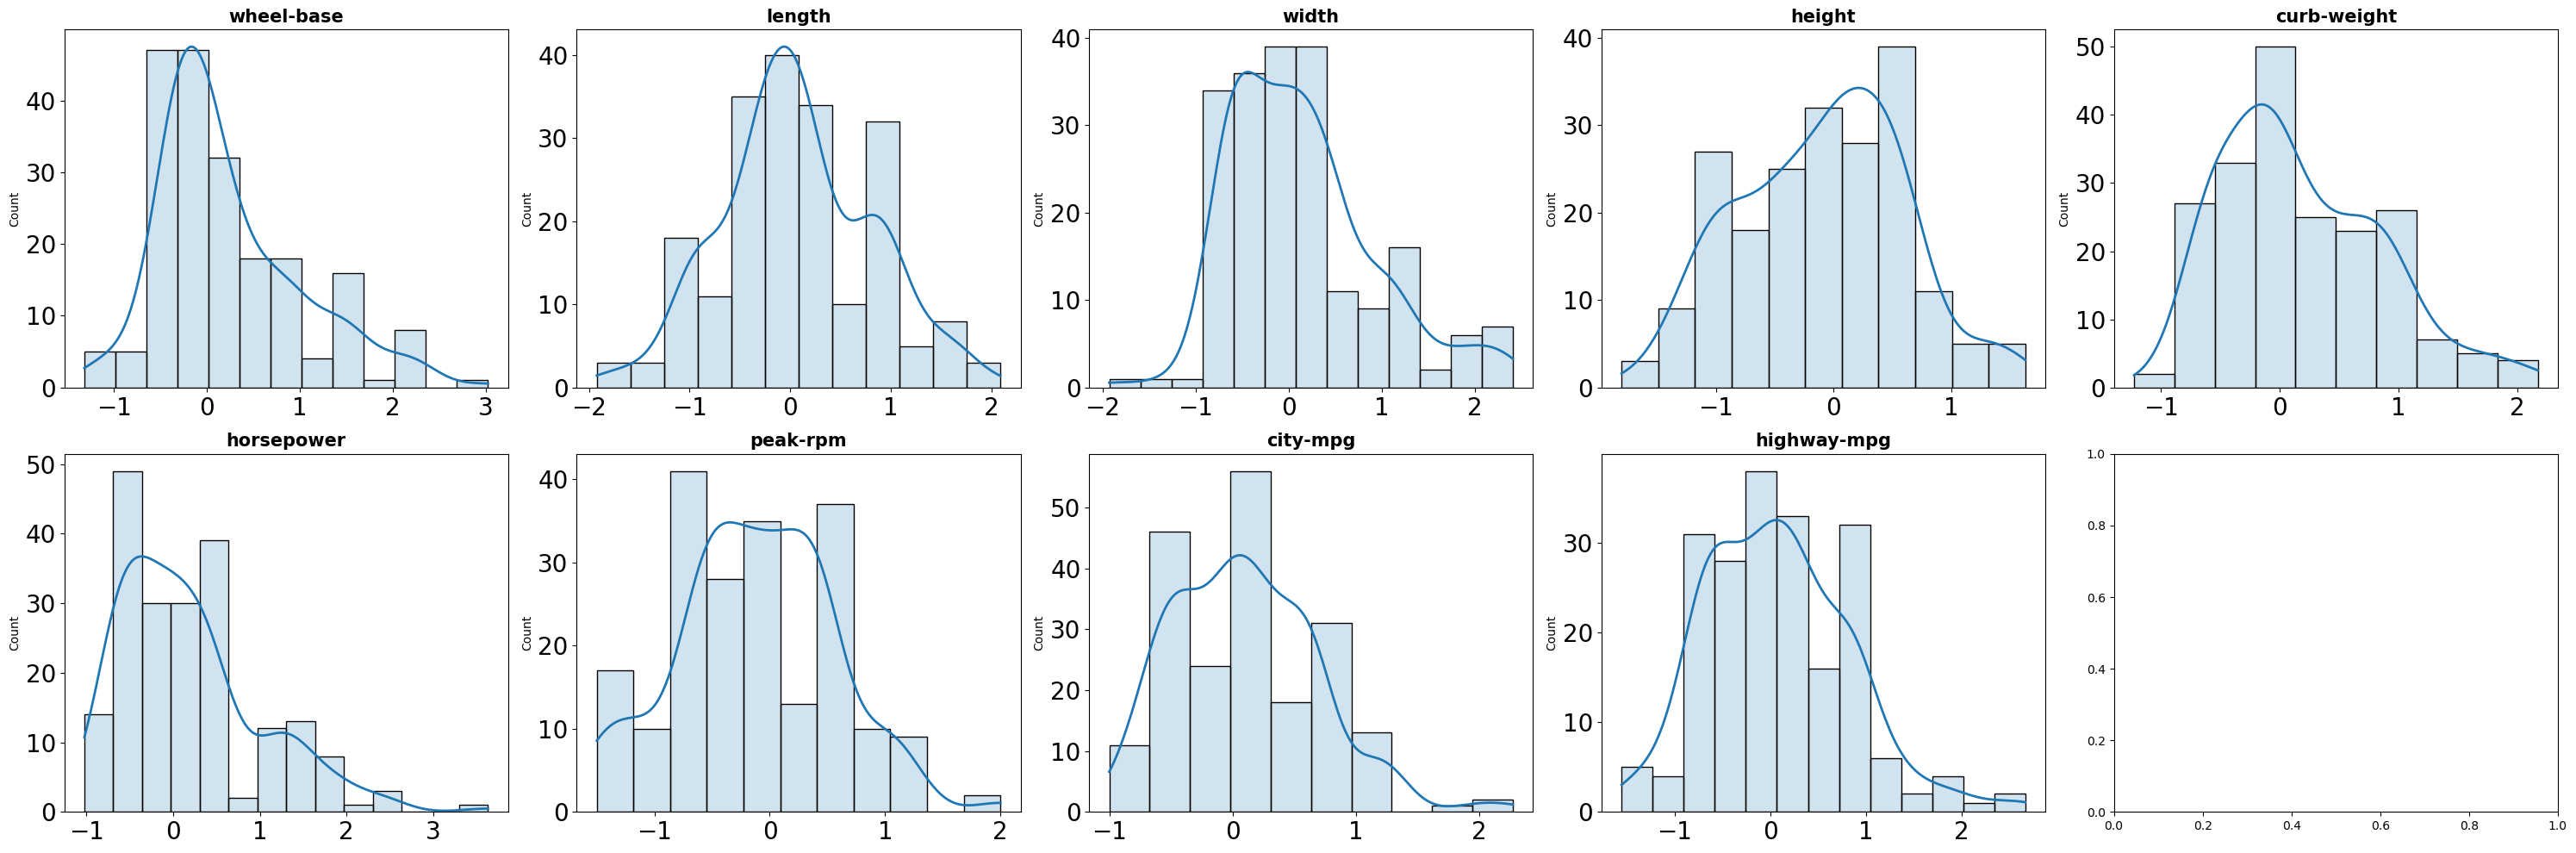

In [27]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 10))

columnas_robust = numericas_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_robust): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
plt.tight_layout()

>Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [28]:
df.to_csv('datos/coches_estandarizacion.csv')